In [24]:
import operator
import sys

COMMAND = "drawgraph"
startSize = "550"
batchsize = "110"
fileName = "run.out.learner."+startSize+"."+batchsize+".t"
inFile = open(fileName,"r")
data = {}
counts = {}
experiments = {}
for line in inFile:
    line = line.rstrip()
    fields = line.split("\t")
    if len(fields) != 2: sys.exit(COMMAND+": unexpected input line (TAB): "+line)
    key,value = fields
    if not key in data:
        data[key] = float(value)
        counts[key] = 1
    else:
        data[key] += float(value)
        counts[key] += 1
    fields = key.split(" ")
    if len(fields) != 4: sys.exit(COMMAND+": unexpected input line (SPACE): "+line)
    experiments[fields[0]+" "+fields[1]]= True
inFile.close()

finalValues = {}
maxSize = {}
bestSmartExp = ""
bestSmartExpScore = 0.0
bestSmartExpSize = 0
for key in data:
    exp,stepSize,totalSize,dummy = key.split()
    if not exp in maxSize or int(totalSize) > maxSize[exp]:
        maxSize[exp] = int(totalSize)
        finalValues[exp] = data[key]/counts[key]
        if exp != "r" and exp != "t" and exp != "t-R" and \
            ((finalValues[exp] > bestSmartExpScore and maxSize[exp] >= bestSmartExpSize) or \
             maxSize[exp] > bestSmartExpSize):
            bestSmartExpScore = finalValues[exp]
            bestSmartExpSize = maxSize[exp]
            bestSmartExp = exp
sortedExps = sorted(finalValues,key=finalValues.get,reverse=True)

<IPython.core.display.Javascript object>


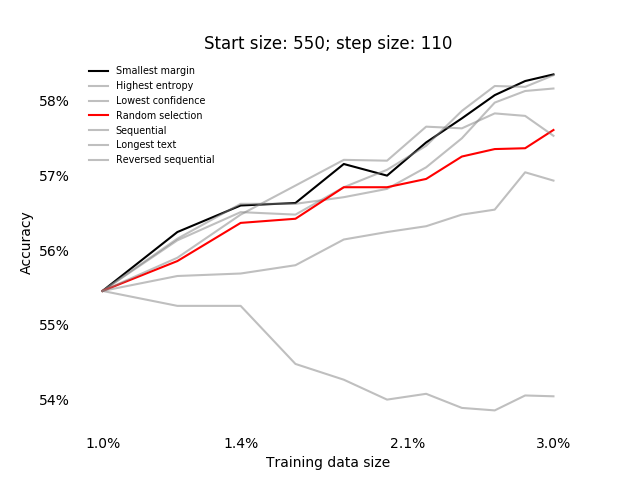

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import math
import re
labels = { "e":"Highest entropy","c":"Lowest confidence","l":"Longest text","m":"Smallest margin",\
           "r":"Random selection","t":"Sequential","t-R":"Reversed sequential"}
plt.figure()
for exp in sortedExps:
    x = []
    y = []
    for key in data:
        fields = key.split(" ")
        if fields[0] == exp:
            x.append(float(fields[2])/550.29)
            y.append(data[key]/counts[key])
    if exp == "r":
        plt.plot(x,y,'-',label=labels[exp],color="red")
    elif exp == bestSmartExp:
        plt.plot(x,y,'-',label=labels[exp],color="black")
    else:
        plt.plot(x,y,'-',label=labels[exp],color="gray",alpha=0.5)

plt.legend(frameon=False,fontsize="x-small",loc="upper left")
fig = plt.gca()
fig.set_xscale("log")
fig.set_xlabel("Training data size")
fig.set_ylabel("Accuracy")
fig.set_title("")
fig.tick_params(top='off', bottom='off', left='off', right='off')
for spine in fig.spines.values(): spine.set_visible(False)
xticks = []
nbrOfTicks = 4
for i in range(0,nbrOfTicks):
    xticks.append(0.5+math.exp(math.log(float(startSize))+i*(math.log(float(startSize)+10*float(batchsize))\
                                                        -math.log(float(startSize)))/(nbrOfTicks-1)))
    xticks[-1] = int(0.5+xticks[-1]/55.029)/10
fig.set_xticks(xticks)
labels = [item.get_text() for item in fig.get_xticklabels()]
for i in range(0,nbrOfTicks): labels[i] = str(xticks[i])+"%"
fig.set_xticklabels(labels)
fig.minorticks_off()
fig.set_title("Start size: "+str(startSize)+"; step size: "+str(stepSize))
plt.show()

pattern = re.compile("\.")
fileName = pattern.sub("-",fileName)
plt.savefig(fileName+".pdf")

labels = [item.get_text() for item in fig.get_yticklabels()]
for i in range(0,len(labels)): labels[i] += "%"
fig.set_yticklabels(labels)
plt.savefig(fileName+".pdf")